# Ford GoBike Dataset
#### by Abdullah Elsayed

## Introduction

This dataset has information about trips for Ford FoBike service. All the trips have taken place in February 2019.

#### Dataset attibutes

<ul>
    <li>duration_sec: Trip Duration (seconds)</li>
    <li>start_time: Start Time and Date</li>
    <li>end_time: End Time and Date</li>
    <li>start_station_id: Start Station ID</li>
    <li>start_station_name: Start Station Name</li>
    <li>start_station_latitude: Start Station Latitude</li>
    <li>start_station_longitude: Start Station Longitude</li>
    <li>end_station_id: End Station ID</li>
    <li>end_station_name: End Station Name</li>
    <li>end_station_latitude: End Station Latitude</li>
    <li>end_station_longitude: End Station Longitude</li>
    <li>bike_id: Bike ID </li>
    <li>user_type: User Type (Subscriber or Customer)</li>
    <li>member_birth_year: Member Year of Birth</li>
    <li>member_gender: Member Gender</li>
    <li>bike_share_for_all_trip: Boolean</li>
</ul>

#### Exploration goals
In our exploration we are going to focus on finding the factors the affect the number and duration of the rides. In the following list we stated the features that we will be using during our investigation.

<ul>
    <li>duration_sec</li>
    <li>start_time</li>
    <li>end_time</li>
    <li>start_station_name</li>
    <li>end_station_name</li>
    <li>user_type</li>
    <li>member_birth_year</li>
    <li>member_gender</li>
</ul>

In [63]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### General Investigation

In [64]:
# Laoding the dataset
df = pd.read_csv('gobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [65]:
# Print columns and rows in the dataset
df.shape

(183412, 16)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [67]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [68]:
# Check for null values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Observations
<ul>
    <li>The dataset consist of 183412 rows and 16 columns</li>
    <li>There are 196 null values in (start_station_id, start_station_name, end_station_id, and end_station_name) and 8265 (member_birth_year and member_gender)</li>
    <li>Start and End time are not in date time format</li>
    <li>There are no duplicated values in the dataset</li>
    <li>Some values in member_birth_year column seem to be invalid</li>
</ul>

### Dataset Cleaning

In the following steps we are going to clean the dataset so we can do our further investigation. In order to clean our data we are going to do the following operations:

<ul>
    <li>Drop unwanted columns</li>
    <li>Drop missing values</li>
    <li>Delete any duplicated rows</li>
    <li>Convert data types</li>
    <li>Inverstigate member_birht_year and drop invalid data values</li>
    <li>Change duration_sec from seconds to minutes</li>
    <li>Change member_birth_year to member_age</li>
    <li>Add new column for age groups</li>
</ul>

Firstly, we are going to drop the columns listed below as we are not going to use it.

<ul>
    <li>start_station_id</li>
    <li>start_station_latitude</li>
    <li>start_station_longitude</li>
    <li>end_station_id</li>
    <li>end_station_latitude</li>
    <li>end_station_longitude</li>
    <li>bike_id</li>
    <li>bike_share_for_all_trip</li>
</ul>

In [69]:
df = df.drop(['start_station_id',
              'start_station_latitude',
              'start_station_longitude',
              'end_station_id',
              'end_station_latitude',
              'end_station_longitude',
              'bike_id',
              'bike_share_for_all_trip'], axis=1);

Now, we are going to delete all the null values in the dataset

In [70]:
# Drop all the rows that have missing valeus
df.dropna(inplace=True)

Then, we are going to converting columns types

In [71]:
# Convert types
df['start_time'] = pd.to_datetime(df['start_time']) # Convert from string to Datetime
df['end_time'] = pd.to_datetime(df['end_time']) # Convert from string to Datetime
df['member_birth_year'] = df['member_birth_year'].astype(int) # Convert from float to int

Now, let us check for duplicated values 

In [72]:
sum(df.duplicated())

0

It seems that there are no duplciated values in our dataset.<br><br>
Now, we are going to change the duration_sec from seconds to minutes, store the new values in a new column and finally delete the old column

In [73]:
df['duration'] = (df['duration_sec'] / 60).astype(int) # Convert second to minutes
df = df.drop(['duration_sec'], axis=1) # Delete duration_sec column

In the following steps, we are going to investigate invalid values in member_birht_year then change it to age instead

In [74]:
df['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

From the above results it is obvious that the minimum value in the column is 1878 which's is clearly wrong. We are going to assume that the maximum age of users is 80 so we are going to select all the rows that have values between 1939 and 2001.

In [75]:
df = df.query('member_birth_year >= 1929 & member_birth_year <= 2001') # Selecting rows with values between 1939 and 2001
df['age'] = 2019 - df['member_birth_year'] # Create age column
df = df.drop(['member_birth_year'], axis=1) # Delete member_birth_year column

Add age group column

In [76]:
# Define conditions
age_conditions = [
    (df['age'] < 20),
    (df['age'] >= 20) & (df['age'] < 25),
    (df['age'] >= 25) & (df['age'] < 30),
    (df['age'] >= 30) & (df['age'] < 40),
    (df['age'] >= 40) & (df['age'] < 50),
    (df['age'] >= 50) & (df['age'] < 60),
    (df['age'] >= 60) & (df['age'] <= 70),
    (df['age'] > 70)
]

# Define values
age_values = [
    'Below 20',
    '20-25',
    '25-30',
    '30-40',
    '40-50',
    '50-60',
    '60-70',
    'Above 70'
]

# Create the age group column
df['age_group'] = np.select(age_conditions, age_values)

In [77]:
# Print the first 5 rows of the dataset after cleaning
df.head()

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,duration,age,age_group
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,869,35,30-40
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,1030,47,40-50
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,608,30,30-40
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,26,45,40-50
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,29,60,60-70


In [78]:
# Recheck the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174875 entries, 0 to 183411
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_time          174875 non-null  datetime64[ns]
 1   end_time            174875 non-null  datetime64[ns]
 2   start_station_name  174875 non-null  object        
 3   end_station_name    174875 non-null  object        
 4   user_type           174875 non-null  object        
 5   member_gender       174875 non-null  object        
 6   duration            174875 non-null  int32         
 7   age                 174875 non-null  int32         
 8   age_group           174875 non-null  object        
dtypes: datetime64[ns](2), int32(2), object(5)
memory usage: 12.0+ MB


## Univariate Exploration

First, let's see the porportion of subscribers and customers

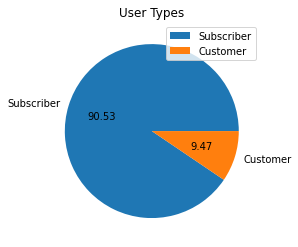

In [79]:
def formatter(pct):
    return '{:0.2f}'.format(pct)

user_type_percent = df['user_type'].value_counts(normalize=True) * 100
labels = user_type_percent.index

plt.pie(x=user_type_percent, labels=labels, autopct=lambda pct: formatter(pct))
plt.title('User Types')
plt.legend();

It seems that nearly 90% of the users are subscribers to the service and only around 10% are customers.<br><br>
Plotting the proportion of genders in the dataset

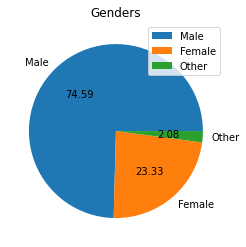

In [80]:
gender_percent = df['member_gender'].value_counts(normalize=True) * 100 # Get percentage of each user type in the dataset
labels = gender_percent.index

plt.pie(x=gender_percent, labels=labels, autopct=lambda pct: formatter(pct))
plt.title('Genders')
plt.legend();

From the above graph, men has the biggest share of rides with percentage of around 75%. The number of rides that was done are around 23.5% and only 2% of rides was made by people with other genders. The gap is very large between the different genders. This might indicate that females did not find the service good for them. We can solve this through survays to see what we can afford for these groups.<br><br>
Plot the distribution of age in the dataset

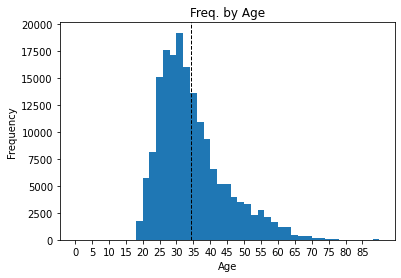

In [81]:
bins = np.arange(0, df['age'].max() + 2, 2) # Defining bins
ticks = [v for v in range(0, 90, 5)] # Tick for the plot
labels = ['{}'.format(v) for v in ticks] # Tciks labels for the plot
plt.hist(data=df, x='age', bins=bins) # Plot the histogram
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=1) # Plot the mean line
plt.title('Freq. by Age')
plt.xticks(ticks, labels) # Set ticks and ticks labels
plt.xlabel('Age') # Set x label
plt.ylabel('Frequency'); # Set y label

The plot is right-skewed which is reasonable because the number of rides should decrease when age gets older. Also, most of the rides was made by people with age between 20 and 50.<br><br>
We will plot the age in bar graph to get a better understand for the age in our dataset. First, we will have to add a new column for age groups. Then, we can plot the rides for each age group.

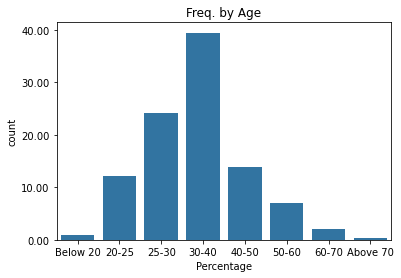

In [82]:
base_color = base_color = sb.color_palette()[0]

age_group_count = df['age_group'].value_counts()
max_age_group_count = age_group_count[0]
n_rows = df.shape[0]
max_prop = max_age_group_count / n_rows
tick_props = np.arange(0, max_prop + 0.1, 0.1)
tick_names = ['{:0.2f}'.format(v*100) for v in tick_props]

sb.countplot(data=df, x='age_group', order=age_values, color=base_color)
plt.yticks(tick_props * n_rows, tick_names)
plt.title('Freq. by Age')
plt.xlabel('Age Group')
plt.xlabel('Percentage');

From the above graph, we can clearly see that the number of rides made by the age group 30-40 is more than any other group. We can definatly use this information in marketing to try to target younger or older age groups.<br><br>
Ploting the distribution of the duration of the rides in the dataset.

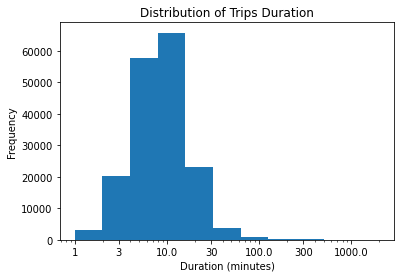

In [83]:
bins = 10 ** np.arange(np.log10(df['duration'].min()),
                       np.log10(df['duration'].max()) + 0.3,
                       0.3)

plt.hist(data=df, x='duration', bins=bins)
plt.title('Distribution of Trips Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xscale('log')
ticks = [1, 3, 1e1, 30, 1e2, 300, 1e3]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

From the above histogram, most of the trips has duration between 3 and 30 mintues.<br><br>
Now, Let us explore other factors like the stations. First, we have to see how many stations do we have in our dataset.

In [84]:
n_stations = df['start_station_name'].nunique()
print('The number of stations is {}'.format(n_stations))

The number of stations is 329


There are 329 stations in the dataset so we are going to plot the top 10 startions only

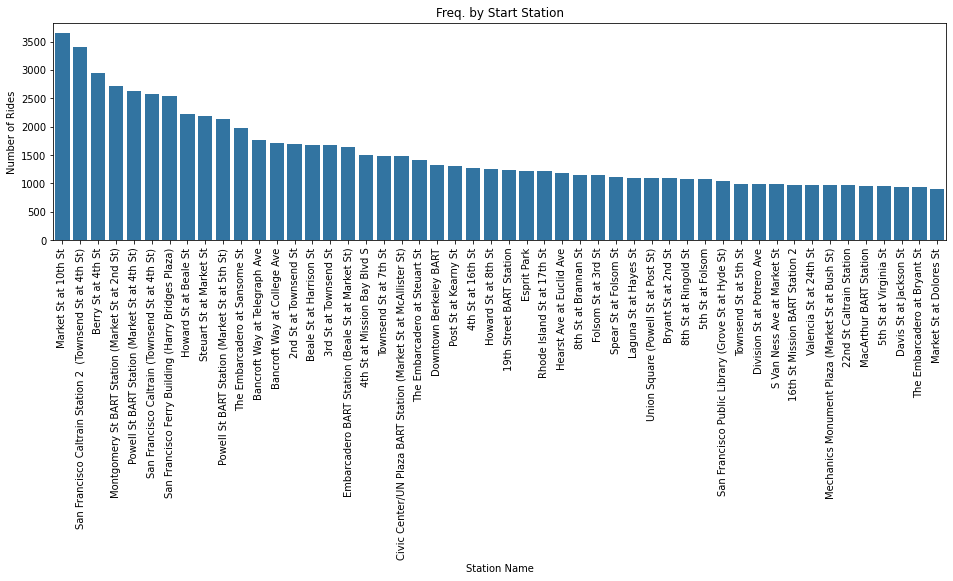

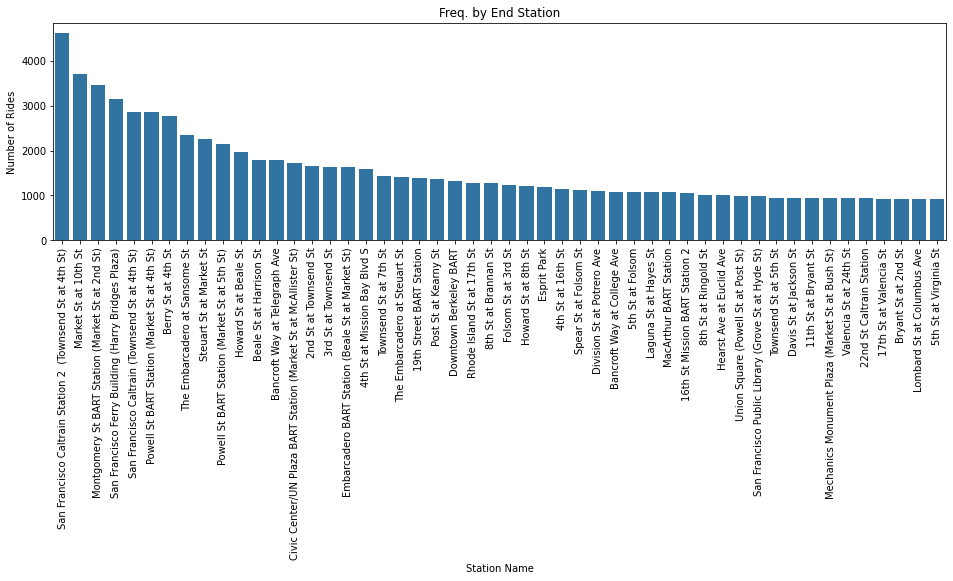

In [85]:
start_stations = df['start_station_name'].value_counts()[:50]
plt.figure(figsize=(16, 4))
sb.countplot(data=df, x='start_station_name', color=base_color, order=start_stations.index)
plt.title('Freq. by Start Station')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90);

end_stations = df['end_station_name'].value_counts()[:50]
plt.figure(figsize=(16, 4))
sb.countplot(data=df, x='end_station_name', color=base_color, order=end_stations.index)
plt.title('Freq. by End Station')
plt.xlabel('Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation=90);

From the two graphs above, It is clear that the traffic in "Market St at 10th St" and "San Francisco Caltrain Station 2 (Townsend St at 4th St)" stations is high. From this information, we should increase the number of bikes in these stations.

Text(0, 0.5, 'Number of Rides')

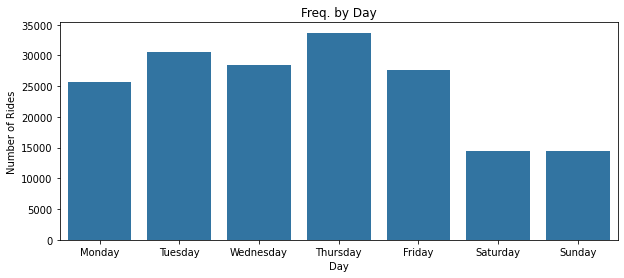

In [86]:
df['trip_day'] = df['start_time'].dt.day_name() # Create trip day column
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 4))
sb.countplot(data=df, x='trip_day', color=base_color, order=order)
plt.title('Freq. by Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')

From the above graph, people make trips more on working days.

Text(0, 0.5, 'Number of Rides')

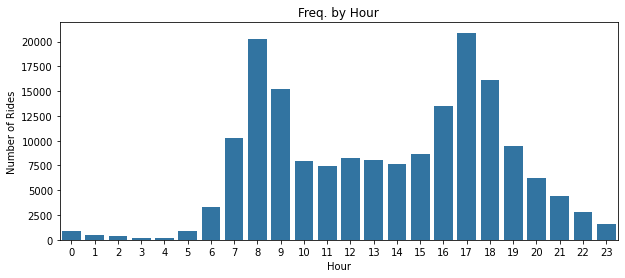

In [87]:
df['trip_hour'] = df['start_time'].dt.hour # Create trip hour column
order = np.arange(0, 24)
plt.figure(figsize=(10, 4))
sb.countplot(data=df, x='trip_hour', color=base_color, order=order)
plt.title('Freq. by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')

The above graph is very interesting. From the graph it is obvious that most of the rides have taken place in the moring hours (7-9) and in the evening (17-19). Most of the rides have taken place in the time when people go to work and go back from work.

## Bivariate Exploration

Text(0, 0.5, 'Duration (minutes)')

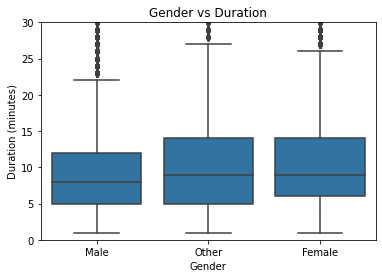

In [88]:
sb.boxplot(data=df, x='member_gender', y='duration', color=base_color)
plt.ylim([0, 30]) # Limit y-axis value
plt.title('Gender vs Duration')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')

From the graph, other genders and females take longer trips than males

Text(0, 0.5, 'Duration (minutes)')

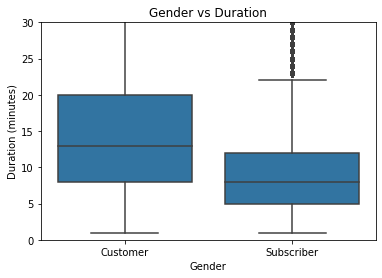

In [89]:
sb.boxplot(data=df, x='user_type', y='duration', color=base_color)
plt.ylim([0, 30]) # Limit y-axis value
plt.title('Gender vs Duration')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')

The graph above shows that higher percentage of customers take longer trips than subscribers.

Text(0, 0.5, 'Duration (minutes)')

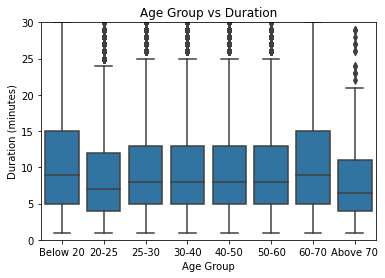

In [90]:
sb.boxplot(data=df, x='age_group', y='duration', color=base_color, order=age_values)
plt.ylim([0, 30]) # Limit y-axis value
plt.title('Age Group vs Duration')
plt.xlabel('Age Group')
plt.ylabel('Duration (minutes)')

People below 20 and people with age between 60 and 70 take longer trips than other groups. Also, age groups of 25-30, 30-40, 40-50, and 50-60 take trips with almost the same duration.

## Multivariate Exploration

In [ ]:
user_types = sb.FacetGrid(data=df, col='user_type', col_wrap=2, height=6, ylim=([0, 40]))
user_types.map(sb.boxplot, 'age_group', 'duration', order=age_values)
user_types.set_titles('{col_name}')
user_types.set_xlabels('Age Group')
user_types.set_ylabels('Duration (minute)')

Customers show a trend of taking longer trips in all age groups compared to subscribers.

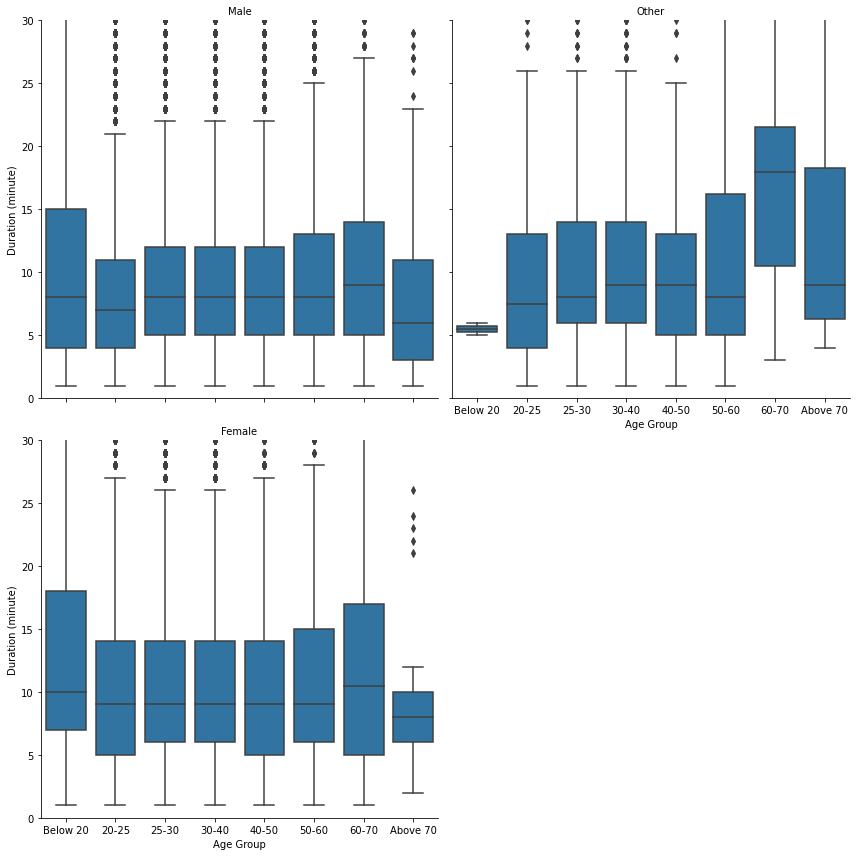

In [ ]:
user_types = sb.FacetGrid(data=df, col='member_gender', col_wrap=2, height=6, ylim=([0, 30]))
user_types.map(sb.boxplot, 'age_group', 'duration', order=age_values)
user_types.set_titles('{col_name}')
user_types.set_xlabels('Age Group')
user_types.set_ylabels('Duration (minute)')

Males and females under 20 have trends of taking longer trips than other age groups. Also, females and other genders of age between 60 and 70 shows that they take longer trips.